<a href="https://colab.research.google.com/github/Elymar-Silva/pdi19.1/blob/master/pdi_19_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fatal: destination path 'processamento_imagens' already exists and is not an empty directory.
(360, 640)


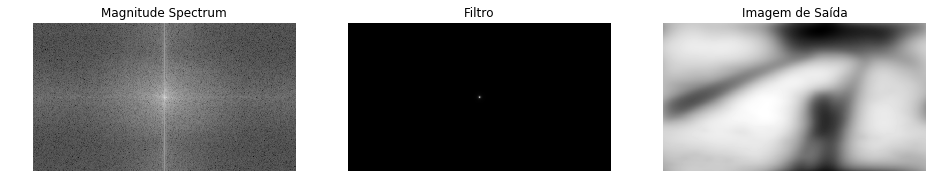

In [20]:
!git clone https://github.com/valmirf/processamento_imagens.git

import cv2
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt


img = cv2.imread('processamento_imagens/imagens/alonecat.jpg',0)

rows, cols = img.shape
crow,ccol = rows//2 , cols//2 #pega ponto central da imagem

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT) #transformada discreta de fourier
dft_shift = np.fft.fftshift(dft) #mudança do ponto DC

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])) #logarítimo para melhor visualização

# Criando o filtro gaussiano
x_size, y_size = rows,cols
x_arr, y_arr = np.mgrid[0:x_size, 0:y_size]
cell = (x_size//2, y_size//2)
print(cell)

#matriz com as distâncias
dists = np.sqrt((x_arr - cell[0])**2 + (y_arr - cell[1])**2)

#sigma e D0 (parâmetros da equação de butterworth)
sigma = 9
n = 0.6

#equacao butterworth
den = np.divide(( (x_arr - cell[0])**2 + (y_arr - cell[1])**2 ), sigma)
fil = np.divide(1, 1 + np.power(den, 2*n))

#cria máscara com o filtro da gaussiana
mask = np.zeros((rows,cols,2))
mask[:,:,0] = fil
mask[:,:,1] = fil

#trasformada inversa
#dftg = cv2.dft(np.float32(imgg),flags = cv2.DFT_COMPLEX_OUTPUT) #transformada discreta de fourier
#dft_shiftg = np.fft.fftshift(dftg) #mudança do ponto DC

#magnitude_spectrumg = 20*np.log(cv2.magnitude(dft_shiftg[:,:,0],dft_shiftg[:,:,1])) #logarítimo para melhor visualização

# aplica a filtragem gaussiana
fshift = dft_shift*mask
# transformada inversa
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

fig, axes = plt.subplots(1, 3, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(magnitude_spectrum, cmap='gray')
ax[0].set_title('Magnitude Spectrum')
ax[0].set_axis_off()

ax[1].imshow(mask[:,:,0], cmap='gray')
ax[1].set_title('Filtro')
ax[1].set_axis_off()

ax[2].imshow(img_back, cmap='gray')
ax[2].set_title('Imagem de Saída')
ax[2].set_axis_off()
	